<a href="https://colab.research.google.com/github/septianidn/APM_11/blob/main/Pertemuan%203/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [3]:
#import library
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[feature_cols].values
y = data['Outcome'].values

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[87 15]
 [31 21]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       102
           1       0.58      0.40      0.48        52

    accuracy                           0.70       154
   macro avg       0.66      0.63      0.63       154
weighted avg       0.69      0.70      0.69       154



In [11]:
error = []

#menghitung error K dari 1 sampai 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

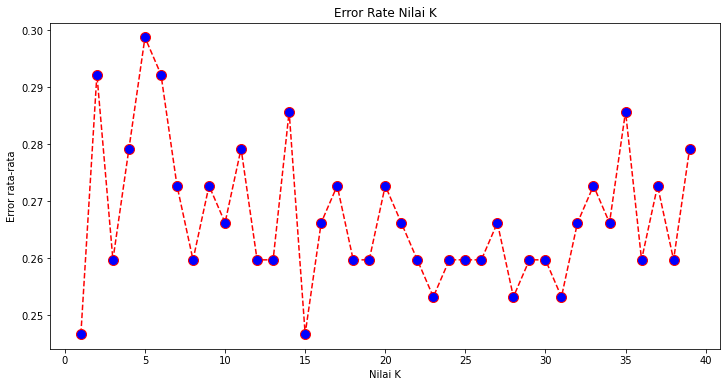

In [12]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')